<a href="https://colab.research.google.com/github/DiploDatos/AnalisisyVisualizacion/blob/master/Entregable_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones**

**Edición 2021**

---
## Trabajo práctico entregable - Parte 1

In [218]:
import io
import matplotlib
import matplotlib.pyplot as plt
import numpy
import pandas as pd
import seaborn
import time
from IPython.display import HTML, display

seaborn.set_context('talk')

## Lectura del dataset

En la notebook 00 se explican los detalles de la siguiente sección.

In [252]:
url = 'https://cs.famaf.unc.edu.ar/~mteruel/datasets/diplodatos/sysarmy_survey_2020_processed.csv'
df = pd.read_csv(url)

In [253]:
df[:3]

,profile_gender,profile_age,work_country,work_province,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_studies_level,profile_studies_level_state,...,work_has_violence_situations,profile_sexual_orientation,profile_has_disabilities,profile_has_disabilities_hiring_difficulties,company_employee_number,company_main_activity,company_recommended,company_diversity_policies,company_extra_benefits,company_best_companies_city
0,Mujer,26,Argentina,Ciudad Autónoma de Buenos Aires,3.0,3.0,3.0,0,Universitario,En curso,...,En mi trabajo actual,Homosexual,NaN,NaN,501-1000,Servicios / Consultoría de Software / Digital,7,2,"Capacitaciones y/o cursos, Comidas pagas / sub...",NaN
1,Hombre,29,Argentina,Corrientes,5.0,2.0,2.0,4,Universitario,En curso,...,Jamás,Heterosexual,Visual,No,201-500,Otras industrias,8,9,"Horarios flexibles, Stock options / RSUs, Viát...",NaN
2,Mujer,22,Argentina,Ciudad Autónoma de Buenos Aires,2.0,0.0,0.0,0,Secundario,Completado,...,En un trabajo anterior,Bisexual o queer,NaN,No,2001-5000,Otras industrias,6,9,"Clases de gimnasia online, Comidas pagas / sub...",NaN


In [254]:
df.dtypes

profile_gender                                   object
profile_age                                       int64
work_country                                     object
work_province                                    object
profile_years_experience                        float64
work_years_in_company                           float64
work_years_in_current_position                  float64
work_people_in_charge_of                          int64
profile_studies_level                            object
profile_studies_level_state                      object
profile_career                                   object
profile_university                               object
profile_specialization_courses                   object
profile_open_source_contributions                object
profile_programming_as_hobby                     object
work_role                                        object
tools_platform                                   object
tools_programming_languages                     

The correlation coefficient has values between -1 to 1
— A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
— A value closer to 1 implies stronger positive correlation
— A value closer to -1 implies stronger negative correlation

---
### Vemos si existen correlaciones entre variables. De existir variables correlacionadas, podemos descartarlas
---

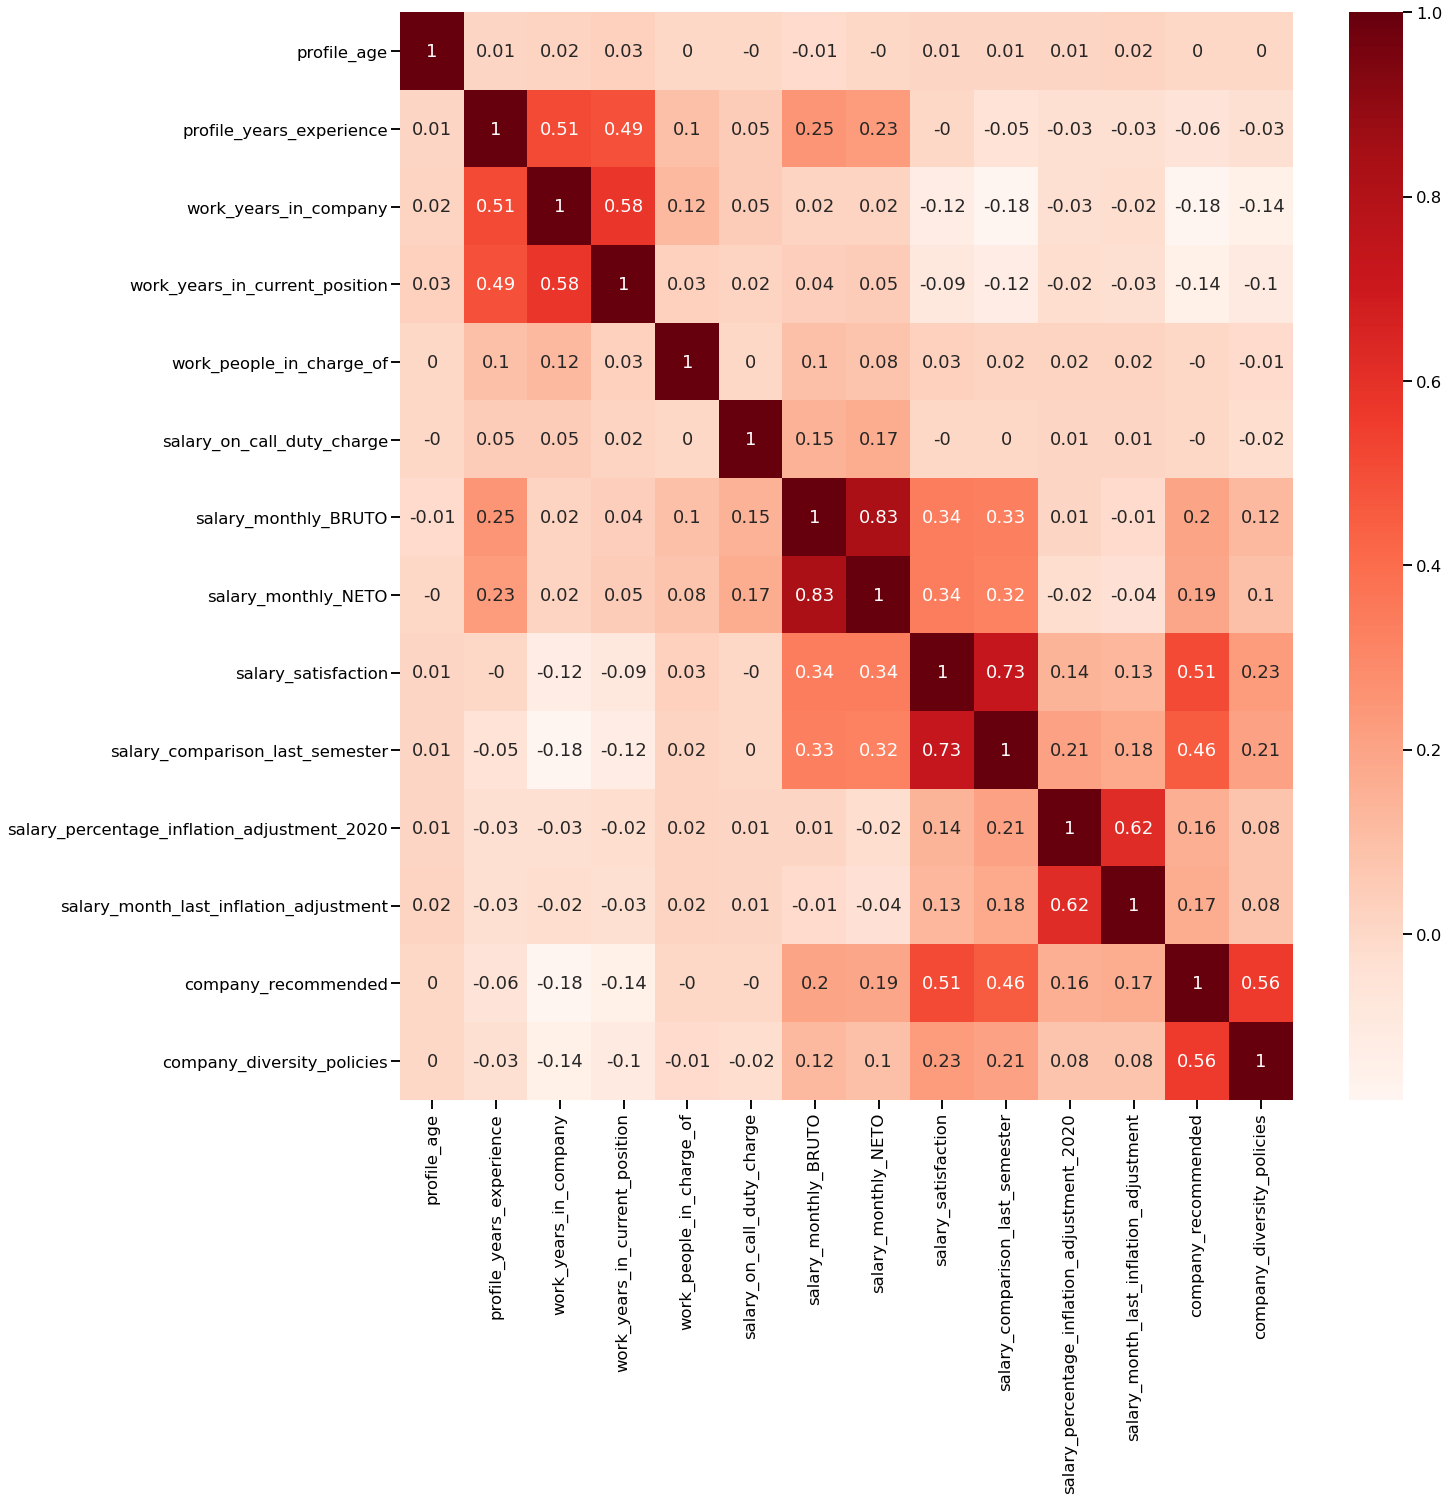

In [255]:
correlations = df.corr().round(2)

#Using Pearson Correlation
plt.figure(figsize=(20,20))

seaborn.heatmap(correlations, annot=True, cmap=plt.cm.Reds)
plt.show()

---
### De lo anterior se desprende que hay una alta correralación entre el salario bruto y el neto lo cual nos permite omitir alguna de las dos columnas. A fines prácticos se mantienen las dos variables. Pero si fuese necesario, se podría descartar alguna de las mismas.
---

# Ejercicio 1 - Análisis descriptivo

Responder a la pregunta: **¿Cuáles son los lenguajes de programación asociados a los mejores salarios?**

Para ello:
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en una sub-población. Por ejemplo, se pueden limitar a personas con un salario mayor que 10000 pesos, o a las personas que trabajan sólo en "Data Science", pero deben justificar su elección y reformular la pregunta inicial de ser necesario.
  * Obtener una lista de los lenguajes de programación más populares. Decidir cuántos y cuáles seleccionan para incluir en el análisis.
  * Para cada una de las otras columnas del punto anterior, elegir los rangos o valores seleccionan para incluir en el análisis.
3. Seleccionar métricas que ayuden a responder la pregunta, y los métodos para analizarlas. Elegir UNA de las siguientes opciones:
  * Comparar las distribuciones de salario para cada lenguaje utilizando visualizaciones. Como la visualización es el producto final, debe ser clara y mostrar información relevante.
  * Comparar medidas de estadística descriptiva sobre la distribución de salario para cada lenguaje. Sean creativos, la estadística descriptiva nos permite decir cosas como: "el 10% de los mejores sueldos los ganan, en su mayoría, programadores que saben kotlin!" (donde *mayoría* es un término medio engañoso que sólo significa más del 50%). Para comparar múltiples lenguajes, les recomendamos usar también visualizaciones.
  * Comparar probabilidades. Por ejemplo: "Si sabés Python o Java, tenés un 30% más de chances de ganar arriba de 100K".

Si lo consideran necesario, realicen varias iteraciones. Es decir, si encuentran que las distribuciones de los lenguajes de programación que seleccionaron inicialmente no son muy diferentes, pueden re-hacer el análisis usando sólo los lenguajes de programación que son diferentes.

---
# Limpieza de datos
---


### Identificamos las columnas que tienen faltantes de datos y las mangintudes de los faltantes

In [256]:
df_isna = df.isna().sum()
df_isna.sort_values(ascending=False)

profile_has_disabilities                        5495
salary_in_usd                                   5419
company_best_companies_city                     4403
profile_has_disabilities_hiring_difficulties    3888
profile_university                               534
profile_career                                   299
salary_monthly_NETO                              212
profile_sexual_orientation                       183
work_has_violence_situations                     141
tools_qa_testing                                   6
tools_platform                                     2
tools_data_bases                                   2
tools_frameworks                                   1
tools_IDEs                                         1
tools_programming_languages                        1
company_extra_benefits                             1
work_people_in_charge_of                           0
profile_programming_as_hobby                       0
profile_age                                   

---
### Se detecta 212 filas las cuales tienen el campo salary_monthly_NETO sin información
---

In [257]:
cantidad_salary_monthly_NETO_nulos = df.salary_monthly_NETO.isna().sum()
cantidad_filas_df = df.shape[0]

print (" Total de filas df: {0}, total de filas donde salary_monthly_NETO no tiene valores: {1} , % {2} ".format(cantidad_filas_df, cantidad_salary_monthly_NETO_nulos ,   (cantidad_salary_monthly_NETO_nulos / cantidad_filas_df * 100).round(2) ))

 Total de filas df: 6095, total de filas donde salary_monthly_NETO no tiene valores: 212 , % 3.48 


### Corregimos las filas que no tiene salario NETO. Para ello tomamos el bruto y lo multiplicamos x 0,83

In [258]:
#Para las filas que no tienen neto, calculamos el neto haciendo BRUTO * 0.83
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if math.isnan(x.salary_monthly_NETO)   else x['salary_monthly_NETO'], axis=1)    

### Controlamos que no existan más filas con NETO sin valores (debe ser 0 la cantidad de filas que no tienen salario neto)

In [259]:
df['salary_monthly_NETO'].isna().sum()

0

### Vemos cuantos casos tenemos de salarios Netos mayores a salarios Brutos

In [260]:
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

156

### Corregimos las filas que no tiene salario NETO. Para ello tomamos el bruto y lo multiplicamos x 0,83. Vamos a poner como bruto al neto, y luego recalculamos en neto (no se contempla descuento de ganancias, descontamos un 17% entre jub, obra soc y otros).

In [261]:
df['recalculate_salary'] = df.apply(lambda x:  x['salary_monthly_NETO'] >  x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_NETO'] if x['recalculate_salary']   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * 0.83 if x['recalculate_salary']   else x['salary_monthly_NETO'], axis=1)    

### Verificamos que no existan mas salarios netos mayores a salarios brutos

In [262]:
df[df.salary_monthly_BRUTO < df.salary_monthly_NETO ].shape[0]

0

In [263]:
df[df.salary_monthly_BRUTO> 1000000]['salary_monthly_BRUTO']

1075    2180000.0
1493    1300000.0
1727    1250000.0
1996    1200000.0
2061    1033000.0
2561    1031250.0
2635    1377600.0
2774    1600000.0
2895    1680000.0
3358    1439100.0
3589    1200000.0
4350    1040000.0
4384    1420000.0
4486    2080000.0
5090    1280000.0
5844    2000000.0
Name: salary_monthly_BRUTO, dtype: float64

### Verificamos los roles puesto que hemos visto que en el set de datos existen roles que no desarrollan / programan. Las filas que tengan estos roles serán eliminadas. 

In [265]:
#df['work_role'].unique()

### Se puede observar que existen roles que no hacen desarrollo. Como lo que se busca es cuales son los lenguajes mejores pagos, se seleccionan / consideran roles vinculados al desarrollo / calidad / devops y NO  roles de gestión, RRHH, etc. 

### Vamos a eliminar todas las filas en las cuales el campo work_role tenga algunos de los siguientes valores:

### Manager, Product Owner,, Administrativo, Construcción y atendedor , Repartido, Responsable, Coordinador, Encargado, Empleado bancario, Gerente, biomedicina, Jefe, Executive, Project Lead, Gastronomía


### Identificamos las filas cumplen con el criterio antes mencionado

In [266]:
result = df['work_role'].str.contains('Scrum Master|Manager|Product Owner|Administrativ|Repartidor|Responsable|Dirección|oordinador|Encargado|bancario|biomedicina|Coach|Jefe|jefe|Executive|Resiliencia|Gastronomía|Project|Maxirest|cadete|director|Finance|Cto|Writer|VP' )
df[result]['work_role'].count()

636

### Eliminamos las filas

In [267]:
df = df[~result ]

### Contrlamos que se hayan eliminado las filas con los roles descritpos anteriomente.

In [268]:
result_tmp = df['work_role'].str.contains('Scrum Master|Manager|Product Owner|Administrativ|Repartidor|Responsable|Dirección|oordinador|Encargado|bancario|biomedicina|Coach|Jefe|jefe|Executive|Resiliencia|Gastronomía|Project|Maxirest|cadete|director|Finance|Cto|Writer|VP' )
df[result_tmp]['work_role'].count()

0

In [269]:
df[df.salary_monthly_BRUTO> 1000000]['salary_monthly_BRUTO']

1075    2180000.0
1493    1300000.0
1727    1250000.0
1996    1200000.0
2061    1033000.0
2561    1031250.0
2774    1600000.0
2895    1680000.0
3358    1439100.0
3589    1200000.0
4350    1040000.0
4384    1420000.0
4486    2080000.0
5090    1280000.0
5844    2000000.0
Name: salary_monthly_BRUTO, dtype: float64

### Vamos a considerar únicamente a las personas que esten full-time, tercerizado o remoto, para el caso de Part-time, como no se sabe la cantidad de horas que trabajan, se elimina las filas.

In [270]:
df['work_contract_type'].unique()

array(['Full-Time', 'Freelance', 'Part-Time',
       'Tercerizado (trabajo a través de consultora o agencia)',
       'Remoto (empresa de otro país)'], dtype=object)

In [271]:
partime_index = df['work_contract_type'].str.contains('Part-Time')
partime_index.sum()

301

### Eliminamos los part-time.

In [272]:
df = df[~partime_index ]
df.shape

(5158, 49)

In [273]:
partime_index_tmp = df['work_contract_type'].str.contains('Part-Time')
partime_index_tmp.sum()

0

In [275]:
df[df.salary_monthly_BRUTO> 1000000]['salary_monthly_BRUTO']

1075    2180000.0
1493    1300000.0
1727    1250000.0
1996    1200000.0
2061    1033000.0
2561    1031250.0
2774    1600000.0
2895    1680000.0
3358    1439100.0
3589    1200000.0
4350    1040000.0
4384    1420000.0
4486    2080000.0
5090    1280000.0
5844    2000000.0
Name: salary_monthly_BRUTO, dtype: float64

In [278]:
df[df.salary_monthly_BRUTO < 1000].to_csv('menores_1000.csv')

### Muchos sueldos están expresados en unidades de mil. Por ejemplo para 82000, se observa 82. Normalizamos el formato de los sueldos a unidades de mil (82 --> 82000). Para ello buscamos filas donde el sueldo neto y bruto sean menores a 10000 y que no sean sueldos dolarizados.

In [279]:
filtro_dolar = 'Mi sueldo está dolarizado'
#Filtrar que no sean en dolares
us_limit = 10000
pesos_limit = 1000
df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * pesos_limit if ((x['salary_monthly_BRUTO'] < pesos_limit) & (x['salary_in_usd'] != filtro_dolar ) )  else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO'] = df.apply(lambda x: x['salary_monthly_NETO'] * pesos_limit if ((x['salary_monthly_NETO'] < pesos_limit ) & (x['salary_in_usd'] != filtro_dolar ) )  else x['salary_monthly_NETO'], axis=1)

In [280]:
((df['salary_monthly_BRUTO'] < us_limit) & (df['salary_in_usd'] !=filtro_dolar ) ).sum()

8

In [281]:
((df['salary_monthly_NETO'] < us_limit) & (df['salary_in_usd'] !=filtro_dolar ) ).sum()

16

In [282]:
df[df.salary_monthly_BRUTO> 1000000]['salary_monthly_BRUTO']

1075    2180000.0
1493    1300000.0
1727    1250000.0
1996    1200000.0
2061    1033000.0
2561    1031250.0
2774    1600000.0
2895    1680000.0
3358    1439100.0
3589    1200000.0
4350    1040000.0
4384    1420000.0
4486    2080000.0
5090    1280000.0
5844    2000000.0
Name: salary_monthly_BRUTO, dtype: float64

### Se pesifican los sueldos en dolares para poder analizarlos en conjunto con los que estan en pesos. 

In [283]:
df_salary_to_convert = ((df.salary_monthly_NETO <= us_limit) & (df.salary_in_usd == filtro_dolar) )

print(f"Cantidad de salarios en dolares a ser pesificados :  {df_salary_to_convert.sum()},  porcentaje respecto al total % {(df_salary_to_convert.sum()  / df.shape[0]).round(3) }")

Cantidad de salarios en dolares a ser pesificados :  25,  porcentaje respecto al total % 0.005


### Listamos los sueldos dolarizados

In [284]:
df[df_salary_to_convert][['salary_monthly_BRUTO', 'salary_monthly_NETO','salary_in_usd']]

,salary_monthly_BRUTO,salary_monthly_NETO,salary_in_usd
224,5000.00,5000.0,Mi sueldo está dolarizado
246,90.00,60.0,Mi sueldo está dolarizado
844,155.00,110.0,Mi sueldo está dolarizado
910,260000.00,160.0,Mi sueldo está dolarizado
924,6000.00,6000.0,Mi sueldo está dolarizado
982,195000.00,185.0,Mi sueldo está dolarizado
1425,280.00,260.0,Mi sueldo está dolarizado
1701,370.00,307.1,Mi sueldo está dolarizado
1820,220000.00,145.0,Mi sueldo está dolarizado
2212,175000.00,125.0,Mi sueldo está dolarizado


### Convertimos a $ los sueldos dolarizados. Tomamos como fuente el valor blue reportado en https://www.cotizacion-dolar.com.ar/dolar-blue-historico-2020.php . Se toma fecha 25/08/2020 (fecha en la que se realizó la encuesta) , valor compra.

In [288]:
valor_dolar = 133

df['salary_monthly_BRUTO'] = df.apply(lambda x: x['salary_monthly_BRUTO'] * valor_dolar if (( x['salary_monthly_BRUTO']  < us_limit) & (x['salary_in_usd'] == filtro_dolar ))   else x['salary_monthly_BRUTO'], axis=1)    
df['salary_monthly_NETO']  = df.apply(lambda x: x['salary_monthly_NETO']  * valor_dolar if (( x['salary_monthly_NETO']  < us_limit) & (x['salary_in_usd'] == filtro_dolar ))  else x['salary_monthly_NETO'], axis=1)

In [289]:
print(f"Cantidad de salarios <= {us_limit} : {((df.salary_monthly_BRUTO <= us_limit) &  (df.salary_in_usd == filtro_dolar)).sum().round(2)}, % respecto al total {(df_salary_to_convert.sum()  / df.shape[0]).round(2) }")

Cantidad de salarios <= 10000 : 0, % respecto al total 0.0


In [290]:
(df.salary_monthly_BRUTO <= us_limit).sum()

9

### Eliminamos los salarios que estan por debajo de 10000, por ser salarios 'sospechosos'. No son dolarizados, no estan expresados en unidades de miles.

In [291]:
index_to_drop = df[df.salary_monthly_NETO <= us_limit].index
df.drop(index_to_drop, inplace = True)

In [292]:
print(f"Cantidad de salarios <= {us_limit} : {(df.salary_monthly_NETO <= 10000).sum()}, porcentaje respecto al total {(df.salary_monthly_NETO <= us_limit).sum()  / df.shape[0] }")

Cantidad de salarios <= 10000 : 0, porcentaje respecto al total 0.0


### Se toma el salario Neto para realizar los siguientes análisis.

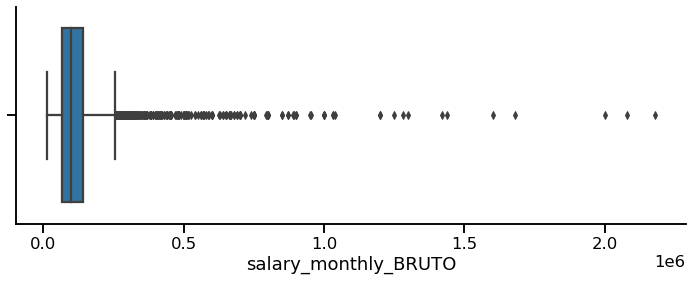

In [295]:
plt.figure(figsize=(12, 4))
seaborn.boxplot(x=df['salary_monthly_BRUTO'])
seaborn.despine()

### Se agrupan sueldos por work_role. Creemos que work_role es una variable que influye en el salario. Por ejemplo, un lider técnico gana más que un developer

In [298]:

df_lang_clean_group_by_programming_language = df.groupby(['work_role'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
df_lang_clean_group_by_programming_language

work_role salary_monthly_BRUTO  \
                                                                       mean   
0                                   buyer / commercial            140000.00   
1                                                    ,             40000.00   
2                        AV Technical Leader - Support             80300.00   
3                            Access Management Analyst             52400.00   
4                                      Account manager             45000.00   
..                                                 ...                  ...   
252                                  technical analyst             60000.00   
253                                            tecnico             20000.00   
254                                todos los de arriba            180000.00   
255  trabajo como desarrollador back, pero también ...             66714.38   
256                                  técnico reparador             43500.00   

                                 
           min        max count  
0    140000.00  140000.00     1  
1     40000.00   40000.00     1  
2     80300.00   80300.00     1  
3     52400.00   52400.00     1  
4     45000.00   45000.00     1  
..         ...        ...   ...  
252   60000.00   60000.00     1  
253   20000.00   20000.00     1  
254  180000.00  180000.00     1  
255   66714.38   66714.38     1  
256   43500.00   43500.00     1  

[257 rows x 5 columns]

### Ordenamos la agrupación de work_role por cantidades. Se puede observar que el rol Developer es el más común

In [300]:
df_lang_clean_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:30]

work_role salary_monthly_BRUTO                       \
                                                    mean       min        max   
66                        Developer        126090.231287   17000.0  2180000.0   
199         SysAdmin / DevOps / SRE        128492.688976   25000.0  1680000.0   
207                Technical Leader        195412.674333   17000.0  2080000.0   
150                     QA / Tester        103111.099837   25000.0  1033000.0   
89                         HelpDesk         61687.315593   14000.0   508252.0   
28                        Architect        194177.896552   11970.0  1439100.0   
48                       Consultant        100390.171556   15000.0   700000.0   
57   Data Scientist / Data Engineer        162143.598485   23000.0  1200000.0   
35        BI Analyst / Data Analyst         94458.028015   21700.0   271802.0   
130                      Networking         98051.598760   30000.0  1200000.0   
39                 Business Analyst        102318.447500   37800.0   381000.0   
225                              UX         95225.494624   35000.0   392000.0   
102                         Infosec        124403.148148   43930.0   312100.0   
157                  Recruiter / HR        100939.301887   35900.0   200000.0   
53                              DBA        161598.058824   26000.0  1250000.0   
62                         Designer         69699.152174   13300.0   190000.0   
163               Sales / Pre-Sales        157545.115385   18073.0  1000000.0   
123                      Middleware        115586.363636   36000.0   210000.0   
197                Storage / Backup         97600.000000   57000.0   145000.0   
127                             NLP        100233.000000   77000.0   118337.0   
184               Software Engineer        171000.000000  122000.0   250000.0   
63                           DevOps        190500.000000   85000.0   325000.0   
11               Analista Funcional         75525.000000   45000.0   101000.0   
79               Functional Analyst         99333.333333   60000.0   133000.0   
212                         Tecnico         32500.000000   22000.0    43000.0   
38                  Blockchain Team        137000.000000  137000.0   137000.0   
45                   Cloud Engineer        107500.000000  100000.0   115000.0   
32                          Auditor         87500.000000   65000.0   110000.0   
118                      Maquetador         36205.000000   36205.0    36205.0   
65                        DevSecOps        176500.000000  125000.0   228000.0   

           
    count  
66   2222  
199   654  
207   390  
150   245  
89    177  
28    174  
48    135  
57    132  
35    131  
130   121  
39    108  
225    93  
102    81  
157    53  
53     51  
62     46  
163    26  
123    22  
197    10  
127     6  
184     5  
63      4  
11      4  
79      3  
212     2  
38      2  
45      2  
32      2  
118     2  
65      2

### Se observa que la varialbe work_role influyen en el salario, es por ello que la agregaos a las columnas relevantes.

In [301]:

relevant_columns = ['tools_programming_languages', 'salary_monthly_NETO' ,'salary_monthly_BRUTO', 'work_role']

### Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es `tools_programming_languages`. Sus valores son strings con los lenguajes seleccionados separados por comas.



In [305]:
df.tools_programming_languages[:3]

0                     Ninguno
1    HTML, Javascript, Python
2                     Ninguno
Name: tools_programming_languages, dtype: object

### En el data set se encontro 'Ninguno' como lenguaje de programación. Se eliminan las filas que tienen como lenguaje a 'Ninguno'

In [307]:
df = df[df['tools_programming_languages'] != 'Ninguno']

### Se eliminan las filas que  estan fuera de la franja  para trabajar. Dejamos los filas que se encuentre entre 18 y 65

In [308]:
edad_limite_inferior = 18
edad_limite_superior = 65

rows_to_delete = df[(df.profile_age <= edad_limite_inferior) | (df.profile_age >= edad_limite_superior ) ].index
df_age_cleaned = df.drop(rows_to_delete)

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.

Conteo de frecuencias de los lenguajes de programación

La columna que contiene información sobre los lenguajes de programación utilizados es tools_programming_languages. Sus valores son strings con los lenguajes seleccionados separados por comas.

Las siguientes celdas de código separan estos lenguajes de programación y cuentan la frecuencia con la que aparecen.

No es necesario entender este código en profundidad, aunque sí es un buen ejercicio.


In [309]:
# Convert the comma-separated string of languages to a list of string.
# Remove 'ninguno de los anteriores' option, spaces and training commas.
def split_languages(languages_str):
  if not isinstance(languages_str, str):
    return []
  # Remove 'other' option
  languages_str = languages_str.lower()\
    .replace('ninguno de los anteriores', '')
  # Split string into list of items
  # Remove spaces and commas for each item
  return [lang.strip().replace(',', '')
          for lang in languages_str.split()]

# Create a new column with the list of languages
df.loc[:, 'cured_programming_languages'] = df.tools_programming_languages\
    .apply(split_languages)
if 'cured_programming_languages' not in relevant_columns:
    relevant_columns.append('cured_programming_languages') 



In [310]:
# Duplicate each row of df for each programming language
# mentioned in the response.
# We only include in df_lang the columns we are going to analyze later, so we
# don't duplicate innecesary information.

def duplicate_rows(df, relevant_columns):

    df_lang = df.cured_programming_languages\
        .apply(pd.Series).stack()\
        .reset_index(level=-1, drop=True).to_frame()\
        .join(df[relevant_columns])\
        .rename(columns={0: 'programming_language'})
    # Horrible programming style! But a lot of data science code can be written with
    # as concatenations of functions (pipelines), and there's no elegant way of
    # doing that on Python.
    
    return df_lang


### Se generan dos data frames

- df_lang: Con este DF se trabaja en la parte 1 del entregable.
- df_lang_part_2: Con este DF se trabaja  en la parte 2 del entregable

### En este punto ambos dataframes tienen las mismas filas

In [311]:
df_lang = duplicate_rows(df, relevant_columns)
df_lang[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


In [312]:
cloumns_part_2 = relevant_columns + ['profile_studies_level_state','profile_studies_level', 'profile_years_experience', 'work_years_in_company' , 'work_years_in_current_position' , 'work_people_in_charge_of' , 'profile_gender' , 'salary_percentage_inflation_adjustment_2020' ]

df_lang_part_2 = duplicate_rows(df, cloumns_part_2)
df_lang_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0


En la columna `programming_language` se encuentra cada lenguaje por separado. Notar que si una respuesta contenía 3 lenguajes, como `"HTML, Javascript, Python"`, la fila ha sido replicada 3 veces. Por ello, hay tres filas con índice 1.

In [313]:
language_count = df_lang.programming_language.value_counts()\
    .reset_index()\
    .rename(columns={'index': 'language', 'programming_language': 'frequency'})
language_count[:10]

,language,frequency
0,javascript,2182
1,sql,1838
2,html,1597
3,python,1263
4,java,1228
5,css,1100
6,bash/shell,879
7,php,709
8,typescript,701
9,.net,694


### Se calcula el % que tiene cada lenguaje respecto al total del lenguajes. Se los ordena por orden de popularidad.

In [315]:
total_lenguajes = language_count['frequency'].sum()
language_count['porc'] = ((language_count['frequency'] / total_lenguajes).round(4)) * 100
language_count

,language,frequency,porc
0,javascript,2182,14.41
1,sql,1838,12.14
2,html,1597,10.55
3,python,1263,8.34
4,java,1228,8.11
...,...,...,...
189,qlikview,1,0.01
190,bi,1,0.01
191,android,1,0.01
192,robin,1,0.01


## Filtrado de lenguajes relevantes

El siguiente código permite seleccionar sólo las filas donde el valor de la columna `programming_language` se encuentre en la lista `interesting_languages`.

### Se buscan los lenguajes cuyas frecuencias totalicen el 90% de la muestra.

In [318]:

index = 1 
porc_target = 95
while language_count[:index]['porc'].sum()  <= porc_target:
    print(" Indice :" , index , " Total %" ,  language_count[:index]['porc'].sum() , end = "")
    index = index + 1



 Indice : 1  Total % 14.41 Indice : 2  Total % 26.549999999999997 Indice : 3  Total % 37.099999999999994 Indice : 4  Total % 45.44 Indice : 5  Total % 53.55 Indice : 6  Total % 60.809999999999995 Indice : 7  Total % 66.61 Indice : 8  Total % 71.28999999999999 Indice : 9  Total % 75.91999999999999 Indice : 10  Total % 80.49999999999999 Indice : 11  Total % 84.65999999999998 Indice : 12  Total % 86.40999999999998 Indice : 13  Total % 87.79999999999998 Indice : 14  Total % 89.16999999999999 Indice : 15  Total % 90.46 Indice : 16  Total % 91.57 Indice : 17  Total % 92.55 Indice : 18  Total % 93.35 Indice : 19  Total % 94.00999999999999 Indice : 20  Total % 94.6


Indicar que se toman los lenguajes más representativos en base al punto de inflexión que se observa en el gráfico

 Hallazgo interesante: Tanto visualmente como porcentualmente, se llega a la misma 
conclusión que es tomar los 15 lenguajes más  frecuentes. 
El en gráfico se puede observar como a partir del lenguaje en la ubicación 20 (lenguaje R), la curva de frecuencias absolutas se 'desploma'

### Se grafica la frencuencia de los lenguajes. Los lenguajes están ordenados de manera decreciente, según su frencuencia. En el eje de las abscisas se muetra la frencuencia de lenguajes.

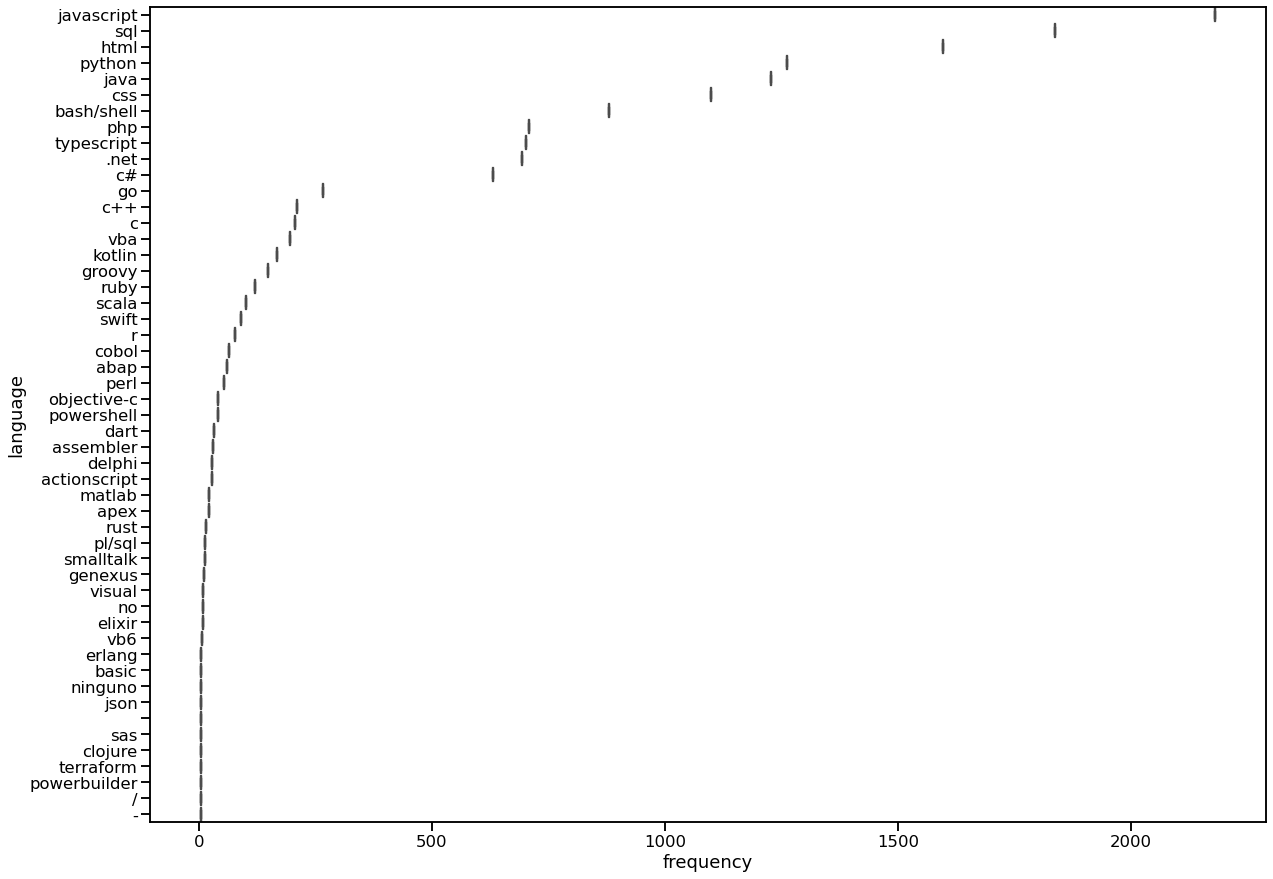

In [320]:
plt.figure(figsize=(20, 15))
over_limit = 30
seaborn.boxplot(data=language_count[:index], y=language_count.language[:index + over_limit], x=language_count.frequency,
                 color='orangered')
plt.ticklabel_format(style='plain', axis='x')

In [321]:
language_count[:index]

,language,frequency,porc
0,javascript,2182,14.41
1,sql,1838,12.14
2,html,1597,10.55
3,python,1263,8.34
4,java,1228,8.11
5,css,1100,7.26
6,bash/shell,879,5.80
7,php,709,4.68
8,typescript,701,4.63
9,.net,694,4.58


 ### Se ha observado que tanto gráficamente como numéricamente, los 20 primeros lenguajes totalizan el 95% de la muestra. Se observar que el 5% restante tiene escasa reprensentatividad.
 
### En gráfico se puede observar como a partir del lenguaje en la ubicación 20 (lenguaje R), la curva de frecuencias se hace prácticamente vertical 

In [323]:
interesting_languages  =language_count[:index]['language'].values
interesting_languages

array(['javascript', 'sql', 'html', 'python', 'java', 'css', 'bash/shell',
       'php', 'typescript', '.net', 'c#', 'go', 'c++', 'c', 'vba',
       'kotlin', 'groovy', 'ruby', 'scala', 'swift', 'r'], dtype=object)

In [324]:
# Filter out languages that we want to exclude
# Complete here with your selected list.
#interesting_languages = ["python"]

def filter_intresting_languages(df_lang,intresting_languages):
    
    filtered_df_lang = df_lang[df_lang.programming_language.isin(interesting_languages)]

    return filtered_df_lang

In [326]:
filtered_df_lang = filter_intresting_languages(df_lang,interesting_languages)
filtered_df_lang[:5]


,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]"
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p..."


### Se prepara este dataframe para la parte el Ejercicio 2.

In [332]:
filtered_df_lang_part_2 = filter_intresting_languages(df_lang_part_2,interesting_languages)
filtered_df_lang_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,html,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
1,python,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,bash/shell,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
3,c,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0


#### Se crea un dataframe agrupado por 'programming_language' y luego se visualiza por diferentes criterios de orden

In [333]:
filtered_df_lang_group_by_programming_language = filtered_df_lang.groupby(['programming_language'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
filtered_df_lang_group_by_programming_language

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
0                  .net        118628.749409  17000.0  1033000.0   694
1            bash/shell        151008.402105  17000.0  2080000.0   879
2                     c        150894.626860  11970.0  2080000.0   207
3                    c#        120209.290365  12000.0  1680000.0   630
4                   c++        137319.639333  11970.0  1680000.0   210
5                   css        121965.646073  13300.0  2080000.0  1100
6                    go        196139.832906  40000.0  1600000.0   265
7                groovy        151794.267383  22610.0   440000.0   149
8                  html        121137.668378  13300.0  2080000.0  1597
9                  java        135479.512720  11970.0  2180000.0  1228
10           javascript        133572.871902  13300.0  2180000.0  2182
11               kotlin        188937.391369  11970.0  2180000.0   168
12                  php        118723.768082  11970.0   798000.0   709
13               python        146293.089968  17000.0  1680000.0  1263
14                    r        153220.482564  35900.0  1000000.0    78
15                 ruby        231834.859587  30000.0  2080000.0   121
16                scala        219115.300000  11970.0  1000000.0   100
17                  sql        122214.026795  20000.0  2180000.0  1838
18                swift        210607.111111  50000.0  2000000.0    90
19           typescript        153898.063880  17000.0  2180000.0   701
20                  vba        103367.600359  26890.0   750000.0   195

In [334]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
10           javascript        133572.871902  13300.0  2180000.0  2182
17                  sql        122214.026795  20000.0  2180000.0  1838
8                  html        121137.668378  13300.0  2080000.0  1597
13               python        146293.089968  17000.0  1680000.0  1263
9                  java        135479.512720  11970.0  2180000.0  1228
5                   css        121965.646073  13300.0  2080000.0  1100
1            bash/shell        151008.402105  17000.0  2080000.0   879
12                  php        118723.768082  11970.0   798000.0   709
19           typescript        153898.063880  17000.0  2180000.0   701
0                  .net        118628.749409  17000.0  1033000.0   694
3                    c#        120209.290365  12000.0  1680000.0   630
6                    go        196139.832906  40000.0  1600000.0   265
4                   c++        137319.639333  11970.0  1680000.0   210
2                     c        150894.626860  11970.0  2080000.0   207
20                  vba        103367.600359  26890.0   750000.0   195
11               kotlin        188937.391369  11970.0  2180000.0   168
7                groovy        151794.267383  22610.0   440000.0   149
15                 ruby        231834.859587  30000.0  2080000.0   121
16                scala        219115.300000  11970.0  1000000.0   100
18                swift        210607.111111  50000.0  2000000.0    90
14                    r        153220.482564  35900.0  1000000.0    78

In [335]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'mean')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
15                 ruby        231834.859587  30000.0  2080000.0   121
16                scala        219115.300000  11970.0  1000000.0   100
18                swift        210607.111111  50000.0  2000000.0    90
6                    go        196139.832906  40000.0  1600000.0   265
11               kotlin        188937.391369  11970.0  2180000.0   168
19           typescript        153898.063880  17000.0  2180000.0   701
14                    r        153220.482564  35900.0  1000000.0    78
7                groovy        151794.267383  22610.0   440000.0   149
1            bash/shell        151008.402105  17000.0  2080000.0   879
2                     c        150894.626860  11970.0  2080000.0   207
13               python        146293.089968  17000.0  1680000.0  1263
4                   c++        137319.639333  11970.0  1680000.0   210
9                  java        135479.512720  11970.0  2180000.0  1228
10           javascript        133572.871902  13300.0  2180000.0  2182
17                  sql        122214.026795  20000.0  2180000.0  1838
5                   css        121965.646073  13300.0  2080000.0  1100
8                  html        121137.668378  13300.0  2080000.0  1597
3                    c#        120209.290365  12000.0  1680000.0   630
12                  php        118723.768082  11970.0   798000.0   709
0                  .net        118628.749409  17000.0  1033000.0   694
20                  vba        103367.600359  26890.0   750000.0   195

In [336]:
filtered_df_lang_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'max')],ascending = False)[:]

programming_language salary_monthly_BRUTO                          
                                        mean      min        max count
10           javascript        133572.871902  13300.0  2180000.0  2182
19           typescript        153898.063880  17000.0  2180000.0   701
9                  java        135479.512720  11970.0  2180000.0  1228
11               kotlin        188937.391369  11970.0  2180000.0   168
17                  sql        122214.026795  20000.0  2180000.0  1838
15                 ruby        231834.859587  30000.0  2080000.0   121
2                     c        150894.626860  11970.0  2080000.0   207
5                   css        121965.646073  13300.0  2080000.0  1100
8                  html        121137.668378  13300.0  2080000.0  1597
1            bash/shell        151008.402105  17000.0  2080000.0   879
18                swift        210607.111111  50000.0  2000000.0    90
3                    c#        120209.290365  12000.0  1680000.0   630
4                   c++        137319.639333  11970.0  1680000.0   210
13               python        146293.089968  17000.0  1680000.0  1263
6                    go        196139.832906  40000.0  1600000.0   265
0                  .net        118628.749409  17000.0  1033000.0   694
16                scala        219115.300000  11970.0  1000000.0   100
14                    r        153220.482564  35900.0  1000000.0    78
12                  php        118723.768082  11970.0   798000.0   709
20                  vba        103367.600359  26890.0   750000.0   195
7                groovy        151794.267383  22610.0   440000.0   149

In [337]:
#Esta funcion devuelve 3 dataframes 
# outliers_inferiores: Son los valores que perforan el limite inferior 
# filtered: Son los valores que quedan dentro del rango RIC
# outliers_superiores: Son los valores que perforan el limite superior

def remove_outliers (laguange,filtered_df_lang): 
    
    result = filtered_df_lang[filtered_df_lang.programming_language == laguange]['salary_monthly_BRUTO'].describe()
    RIC = result[6] - result[4]
    Ls = result[6] + RIC * 1.5
    Li = result[4] - RIC * 1.5

    filtered = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO <= Ls) &  (filtered_df_lang.salary_monthly_BRUTO >= Li) ] 
    outliers_superiores = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO >= Ls)] 
    outliers_inferiores = filtered_df_lang[(filtered_df_lang.programming_language == laguange ) &  (filtered_df_lang.salary_monthly_BRUTO <= Li)] 
    
    return (outliers_inferiores,filtered,outliers_inferiores)

In [338]:
# Esta funcion crea un data frame con todos los leguajes especificados en interesting_languages
# en el data frame filtered_df_lang. El nuevo data frame generado, tiene eliminados los outliers inferiores y superiores


def create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang):
    filtered_data_frames = []

    for language in interesting_languages:
        _,tmp,_ = remove_outliers (language, filtered_df_lang)
        filtered_data_frames.append(tmp)

    tmp = pd.concat(filtered_data_frames, axis=0)
    
    return tmp


In [339]:
df_no_outliers_interesting_languages = create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang)

In [340]:
# Este dataframe se prepara para el Ejercicio 2
df_no_outliers_interesting_languages_part_2 = create_df_no_outliers_interesting_languages(interesting_languages , filtered_df_lang_part_2)

In [341]:
df_no_outliers_interesting_languages.shape[0]

13414

In [343]:
df_no_outliers_interesting_languages.describe()

,salary_monthly_NETO,salary_monthly_BRUTO
count,1.341400e+04,13414.000000
mean,8.538449e+04,109247.215042
std,4.495972e+04,55335.869299
min,1.070000e+04,11970.000000
25%,5.630625e+04,67285.000000
50%,8.000000e+04,100000.000000
75%,1.050000e+05,140000.000000
max,1.061340e+06,480000.000000


### Se grafica la curva de distribución de los lenguajes, una vez eliminados los outlayers.

<AxesSubplot:xlabel='salary_monthly_BRUTO', ylabel='Count'>

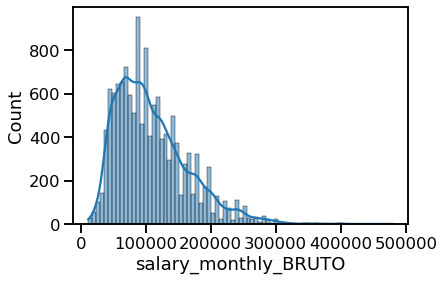

In [344]:
seaborn.histplot(df_no_outliers_interesting_languages['salary_monthly_BRUTO'] , kde=True)

In [347]:
df_no_outliers_interesting_languages_group_by_programming_language = df_no_outliers_interesting_languages.groupby(['programming_language'] , as_index=False).agg({'salary_monthly_BRUTO': ['mean', 'min', 'max' , 'count']})
df_no_outliers_interesting_languages_group_by_programming_language

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
0                  .net        100469.758178  17000.0  234000.0   653
1            bash/shell        119933.497537  17000.0  303689.0   816
2                     c        109692.567158  11970.0  300000.0   190
3                    c#         98407.912998  12000.0  230000.0   587
4                   c++         98508.415855  11970.0  268400.0   193
5                   css         96580.811451  13300.0  244000.0  1020
6                    go        156470.148216  40000.0  350000.0   241
7                groovy        143405.179444  22610.0  350000.0   144
8                  html         96362.448103  13300.0  240000.0  1476
9                  java        119802.773679  11970.0  297000.0  1177
10           javascript        105933.887148  13300.0  270000.0  2016
11               kotlin        154871.845541  11970.0  360000.0   157
12                  php         95066.936983  11970.0  240000.0   653
13               python        120772.284158  17000.0  303689.0  1176
14                    r        110937.052754  35900.0  271802.0    69
15                 ruby        163202.550550  30000.0  480000.0   109
16                scala        177244.891304  11970.0  342500.0    92
17                  sql        101219.918944  20000.0  250000.0  1733
18                swift        157863.132530  50000.0  400500.0    83
19           typescript        116809.274930  17000.0  300000.0   643
20                  vba         90750.978871  26890.0  207000.0   186

In [349]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'count')],ascending = False)[:]

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
10           javascript        105933.887148  13300.0  270000.0  2016
17                  sql        101219.918944  20000.0  250000.0  1733
8                  html         96362.448103  13300.0  240000.0  1476
9                  java        119802.773679  11970.0  297000.0  1177
13               python        120772.284158  17000.0  303689.0  1176
5                   css         96580.811451  13300.0  244000.0  1020
1            bash/shell        119933.497537  17000.0  303689.0   816
12                  php         95066.936983  11970.0  240000.0   653
0                  .net        100469.758178  17000.0  234000.0   653
19           typescript        116809.274930  17000.0  300000.0   643
3                    c#         98407.912998  12000.0  230000.0   587
6                    go        156470.148216  40000.0  350000.0   241
4                   c++         98508.415855  11970.0  268400.0   193
2                     c        109692.567158  11970.0  300000.0   190
20                  vba         90750.978871  26890.0  207000.0   186
11               kotlin        154871.845541  11970.0  360000.0   157
7                groovy        143405.179444  22610.0  350000.0   144
15                 ruby        163202.550550  30000.0  480000.0   109
16                scala        177244.891304  11970.0  342500.0    92
18                swift        157863.132530  50000.0  400500.0    83
14                    r        110937.052754  35900.0  271802.0    69

In [350]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('salary_monthly_BRUTO' , 'mean')],ascending = False)[:]

programming_language salary_monthly_BRUTO                         
                                        mean      min       max count
16                scala        177244.891304  11970.0  342500.0    92
15                 ruby        163202.550550  30000.0  480000.0   109
18                swift        157863.132530  50000.0  400500.0    83
6                    go        156470.148216  40000.0  350000.0   241
11               kotlin        154871.845541  11970.0  360000.0   157
7                groovy        143405.179444  22610.0  350000.0   144
13               python        120772.284158  17000.0  303689.0  1176
1            bash/shell        119933.497537  17000.0  303689.0   816
9                  java        119802.773679  11970.0  297000.0  1177
19           typescript        116809.274930  17000.0  300000.0   643
14                    r        110937.052754  35900.0  271802.0    69
2                     c        109692.567158  11970.0  300000.0   190
10           javascript        105933.887148  13300.0  270000.0  2016
17                  sql        101219.918944  20000.0  250000.0  1733
0                  .net        100469.758178  17000.0  234000.0   653
4                   c++         98508.415855  11970.0  268400.0   193
3                    c#         98407.912998  12000.0  230000.0   587
5                   css         96580.811451  13300.0  244000.0  1020
8                  html         96362.448103  13300.0  240000.0  1476
12                  php         95066.936983  11970.0  240000.0   653
20                  vba         90750.978871  26890.0  207000.0   186

In [355]:
df_no_outliers_interesting_languages_group_by_programming_language.columns = [''.join(col).strip() for col in df_no_outliers_interesting_languages_group_by_programming_language.columns.values]

df_no_outliers_interesting_languages_group_by_programming_language['porc'] = (100 * df_no_outliers_interesting_languages_group_by_programming_language['salary_monthly_BRUTOcount'] / df_no_outliers_interesting_languages_group_by_programming_language['salary_monthly_BRUTOcount'].sum()).round(2)

df_no_outliers_interesting_languages_group_by_programming_language

,programming_language,salary_monthly_BRUTOmean,salary_monthly_BRUTOmin,salary_monthly_BRUTOmax,salary_monthly_BRUTOcount,porc
0,.net,100469.758178,17000.0,234000.0,653,4.87
1,bash/shell,119933.497537,17000.0,303689.0,816,6.08
2,c,109692.567158,11970.0,300000.0,190,1.42
3,c#,98407.912998,12000.0,230000.0,587,4.38
4,c++,98508.415855,11970.0,268400.0,193,1.44
5,css,96580.811451,13300.0,244000.0,1020,7.60
6,go,156470.148216,40000.0,350000.0,241,1.80
7,groovy,143405.179444,22610.0,350000.0,144,1.07
8,html,96362.448103,13300.0,240000.0,1476,11.00
9,java,119802.773679,11970.0,297000.0,1177,8.77


In [367]:
df_no_outliers_interesting_languages_group_by_programming_language.sort_values(by=[('porc')],ascending = False)[['programming_language', 'porc'] ]

,programming_language,porc
10,javascript,15.03
17,sql,12.92
8,html,11.00
13,python,8.77
9,java,8.77
5,css,7.60
1,bash/shell,6.08
12,php,4.87
0,.net,4.87
19,typescript,4.79


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/categorical.py:3772: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


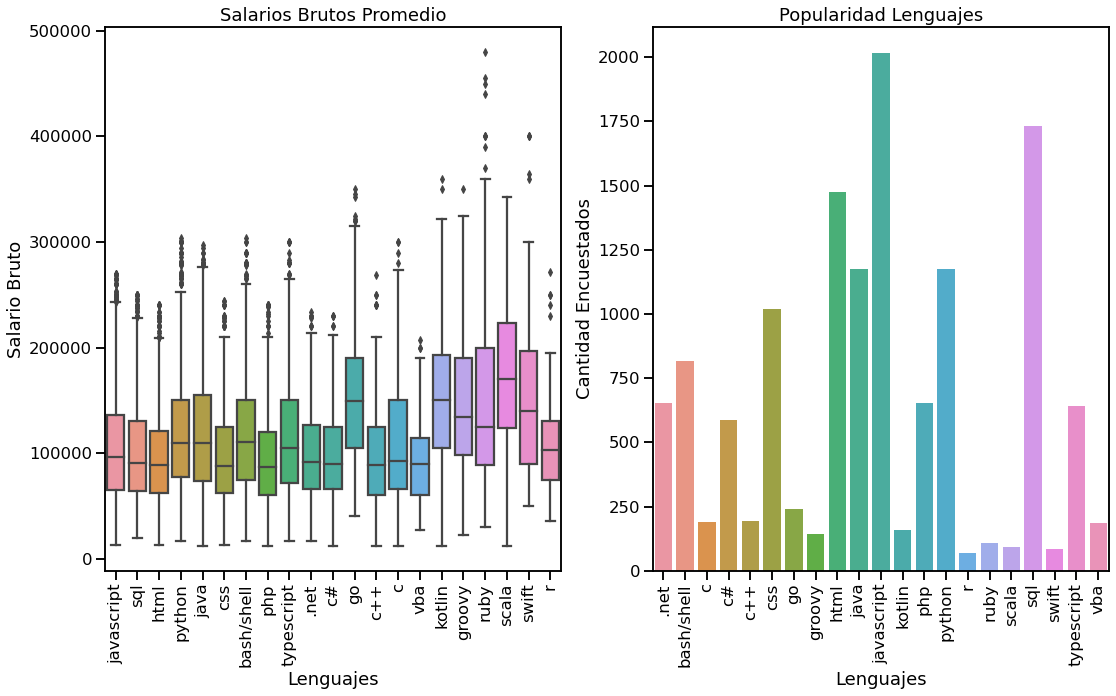

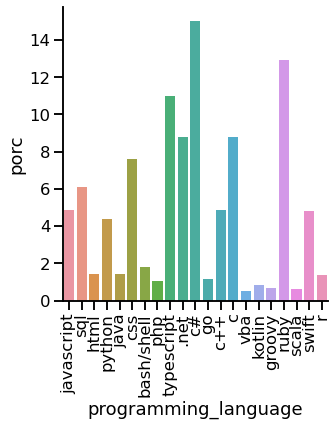

In [368]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))



seaborn.boxplot(ax = axes[0] , x="programming_language", y="salary_monthly_BRUTO", data=df_no_outliers_interesting_languages)
axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
axes[0].set_xlabel('Lenguajes')
axes[0].set_ylabel('Salario Bruto')
axes[0].set_title('Salarios Brutos Promedio')


seaborn.barplot(ax = axes[1] , x="programming_language", y="salary_monthly_BRUTOcount", data=df_no_outliers_interesting_languages_group_by_programming_language)
axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)
axes[1].set_xlabel('Lenguajes')
axes[1].set_ylabel('Cantidad Encuestados')
axes[1].set_title('Popularidad Lenguajes')




graph = seaborn.factorplot(ax = axes[0] , x ='programming_language', y ='porc', kind="bar", data = df_no_outliers_interesting_languages_group_by_programming_language)
graph.set_xticklabels(axes[0].get_xticklabels(),rotation=90)
#graph.set_xlabel('Lenguajes')
#graph.set_ylabel('Cantidad Encuestados')
#graph.set_title('Popularidad Lenguajes')

In [383]:
df_conc = df_no_outliers_interesting_languages_group_by_programming_language
frecuencia_acumulada_populares = 0

def calcular_frec_acumulada(lista_lenguajes, df):
    d = 0 
    for x in lista_lenguajes:
         d = d + df[df['programming_language'] == x].porc.values
    return d

frecuencia_acumulada_populares = calcular_frec_acumulada(['javascript', 'sql', 'html', 'java', 'python','css' , 'bash/shell' ] , df_conc)
frecuencia_acumulada_mayor_sueldo = calcular_frec_acumulada(['scala', 'ruby', 'swift', 'go', 'kotlin','groovy' , 'vba'] , df_conc)

print (f"frecuencia_acumulada_populares : {frecuencia_acumulada_populares}, frecuencia_acumulada_mayor_sueldo {frecuencia_acumulada_mayor_sueldo}")

frecuencia_acumulada_populares : [70.17], frecuencia_acumulada_mayor_sueldo [7.55]



### Se observa 
- Los lenguajes scala, ruby, swift, go, kotlin, groovy y bash/shell son los lenguajes mejores pagos en promedio.
- Los lenguajes javascript, sql, html, java, python, css y vba son los de mayor frecuencia.


### Conclusión: 

### Si bien los lenguajes scala, ruby, swift, go, kotlin, groovy y vba  son los lenguajes de programación asociados a los mejores salarios promedios, se advierte que a la vez tienen baja frecuencia, lo que implica un estimador menos robusto. Es por ello que los lenguajes javascript, sql, html, java, python, css y bash/shell, que son los que presetan mayor frecuencia (y por ende estimadores más robustos) serían los lenguajes asociados a los mejores salarios. 

# Ejercicio 2 - Densidades y varias varialbes

Responder a la pregunta general: **¿Que herramientas (prácticas y teóricas) són útiles para explorar la base, descubrir patrones, asociaciones?**

Para ello considere (igual al ejercicio Anterior):
1. Seleccionar las columnas relevantes para analizar.
2. Seleccionar las filas relevantes para analizar. Esto incluye la eliminación de valores extremos y erróneos, pero también puede enfocar el análisis en sub-poblaciones. 

In [124]:
#Vamos a utilizar el data frame f_no_outliers_interesting_languages_part_2
df_no_outliers_interesting_languages_part_2[:5]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0
3,javascript,"Bash/Shell, C, CSS, HTML, Java, Javascript, PH...",102000.0,130000.0,SysAdmin / DevOps / SRE,"[bash/shell, c, css, html, java, javascript, p...",Incompleto,Posgrado,15.0,15.0,13.0,5,Hombre,0.0
4,javascript,"CSS, HTML, Javascript, SQL, TypeScript",106000.0,140000.0,Developer,"[css, html, javascript, sql, typescript]",En curso,Universitario,9.0,6.0,6.0,0,Hombre,0.0
5,javascript,"Java, Javascript",44000.0,54000.0,Developer,"[java, javascript]",Incompleto,Terciario,1.0,0.0,0.0,0,Hombre,15.0
6,javascript,Javascript,62400.0,75000.0,Developer,[javascript],Incompleto,Universitario,1.0,1.0,1.0,0,Hombre,8.0


## a) Densidad conjunta

Que herramientas visuales y modelos puede utilizar para estudiar la distribución y comportamiento de sus datos? 

Elija tres variables numéricas y 2 variables categóricas. Visualice la base según varias de las variables elegidas. Puede describir de alguna forma el comportamiento de sus datos? Que herramientas utilizaría? Describa




In [125]:
#Distribucion y comportamiento
df_no_outliers_interesting_languages_part_2[:1]

,programming_language,tools_programming_languages,salary_monthly_NETO,salary_monthly_BRUTO,work_role,cured_programming_languages,profile_studies_level_state,profile_studies_level,profile_years_experience,work_years_in_company,work_years_in_current_position,work_people_in_charge_of,profile_gender,salary_percentage_inflation_adjustment_2020
1,javascript,"HTML, Javascript, Python",63000.0,79000.0,Developer,"[html, javascript, python]",En curso,Universitario,5.0,2.0,2.0,4,Hombre,10.0


In [127]:
scale_mapper = {"Primario":1, "Secundario":2, "Terciario":3 , "Universitario":4 , "Posgrado":5 , "Doctorado": 6  , "Posdoctorado" : 7  }
df_no_outliers_interesting_languages_part_2["profile_studies_level_ordinal"]  = df_no_outliers_interesting_languages_part_2["profile_studies_level"].replace(scale_mapper)

/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, 0, 'javascript'),
 Text(1, 0, 'sql'),
 Text(2, 0, 'html'),
 Text(3, 0, 'python'),
 Text(4, 0, 'java'),
 Text(5, 0, 'css'),
 Text(6, 0, 'bash/shell'),
 Text(7, 0, 'php'),
 Text(8, 0, 'typescript'),
 Text(9, 0, '.net'),
 Text(10, 0, 'c#'),
 Text(11, 0, 'go'),
 Text(12, 0, 'c++'),
 Text(13, 0, 'c'),
 Text(14, 0, 'vba'),
 Text(15, 0, 'kotlin'),
 Text(16, 0, 'groovy'),
 Text(17, 0, 'ruby'),
 Text(18, 0, 'scala'),
 Text(19, 0, 'swift'),
 Text(20, 0, 'r')]

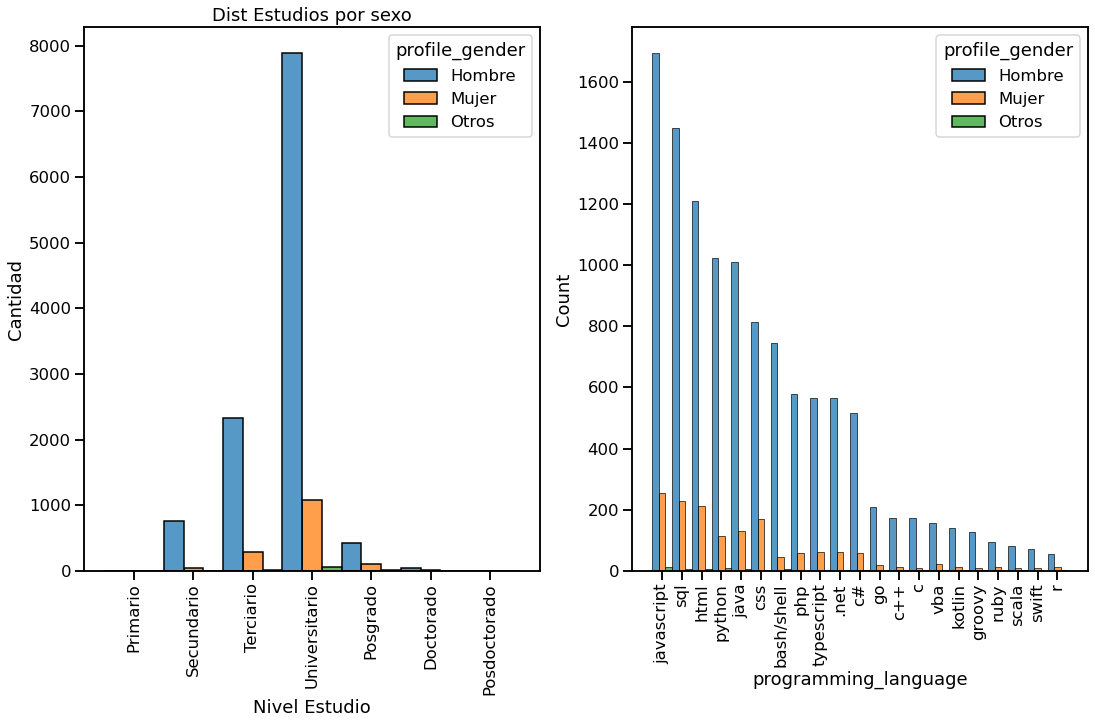

In [129]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.histplot(ax = axes[0], data = df_no_outliers_interesting_languages_part_2.sort_values(by=['profile_studies_level_ordinal']), x="profile_studies_level" , hue="profile_gender"  , multiple="dodge")

seaborn.histplot(ax = axes[1], data = df_no_outliers_interesting_languages_part_2, x="programming_language" , hue="profile_gender"  , multiple="dodge")

axes[0].set_title('Dist Estudios por sexo')
axes[0].set_ylabel('Cantidad')
axes[0].set_xlabel('Nivel Estudio')


plt.draw()

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=90)
#axes[0].legend(handles = axes[0].legend.handles() , title = 'Sexo')


axes[1].set_xticklabels(axes[1].get_xticklabels(),rotation=90)



Se puede ver que el nivel de estudios elevados de los hombres es mucho mas frecuente y también ka oresencia de las mujeres en la programación de los lengiuajes más populares

VER ESTO (porque parece que las proporciones cambian entre tipos de estudios)

<AxesSubplot:xlabel='salary_monthly_BRUTO', ylabel='salary_percentage_inflation_adjustment_2020'>

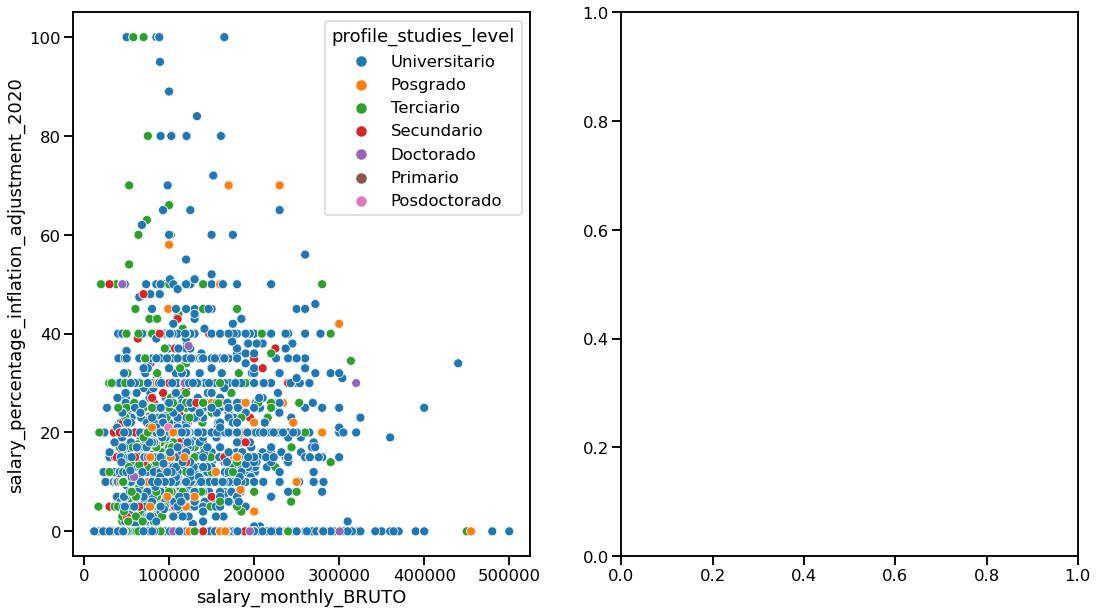

In [130]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_BRUTO", y="salary_percentage_inflation_adjustment_2020" , hue="profile_studies_level")

#seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="work_years_in_company" , hue="profile_studies_level")

## b) Asociación

* Necesitamos decidir si sacar o no la columna de salario bruto. Para hacer la encuesta más simple.
¿Existe una correlación entre el salario bruto y el neto? Que abordaje y medidas usaría



/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


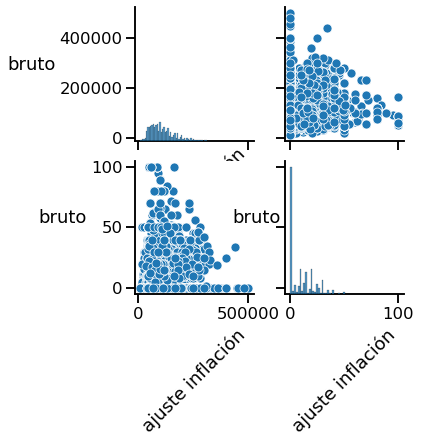

In [131]:
g = seaborn.pairplot(df_no_outliers_interesting_languages_part_2[[ 'salary_monthly_BRUTO', 'salary_percentage_inflation_adjustment_2020' ]])
for axes in g.axes.flat:
     #axes.set_ylabel(axes.get_ylabel(), rotation=0, horizontalalignment='right')
     #axes.set_xlabel(axes.get_xlabel(), rotation=45)
     axes.set_ylabel("bruto", rotation=0, horizontalalignment='right')
     axes.set_xlabel("ajuste inflación", rotation=45)

In [132]:
df_no_outliers_interesting_languages_part_2[ 'salary_monthly_BRUTO'].corr(df_no_outliers_interesting_languages[ 'salary_monthly_NETO'])

0.8273693353421786

In [133]:
# De lo anterior se desprende que hay una alta correralación entre el salario bruto y el neto lo cual nos permite 
# omitir alguna de las dos columnas


## c) Densidad condicional 

Estudie la distribución del salario según el nivel de estudio.

Separe la población según el nivel de estudio (elija dos subpoblaciones numerosas) y grafique de manera comparativa ambos histogramas de la variable `'salary_monthly_NETO'`
¿Considera que ambas variables son independientes?
¿Qué analizaría al respecto?

Calcule medidas de centralización y dispersión para cada subpoblación






In [134]:
pob_terciario = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level']== 'Terciario']
pob_universitario = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level']== 'Universitario']


mean_ter = pob_terciario['salary_monthly_NETO'].mean()
median_ter = pob_terciario['salary_monthly_NETO'].median()
std_ter = pob_terciario['salary_monthly_NETO'].std()

mean_uni = pob_universitario['salary_monthly_BRUTO'].mean()
median_uni = pob_universitario['salary_monthly_BRUTO'].median()
std_uni = pob_universitario['salary_monthly_BRUTO'].std()

print ("Estudios Terciarios")
print (f" Media: {mean_ter} , Mediana: {median_ter} , Des: {std_ter} ")

print ("Estudios Universitarios")
print (f" Media: {mean_uni} , Mediana: {median_uni} , Des: {std_uni} ")


Estudios Terciarios
 Media: 78091.272784522 , Mediana: 72000.0 , Des: 37134.43355654878 
Estudios Universitarios
 Media: 111966.7453992016 , Mediana: 100000.0 , Des: 56350.4400837419 


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/ipykernel_launcher.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  if __name__ == '__main__':
/Users/covied

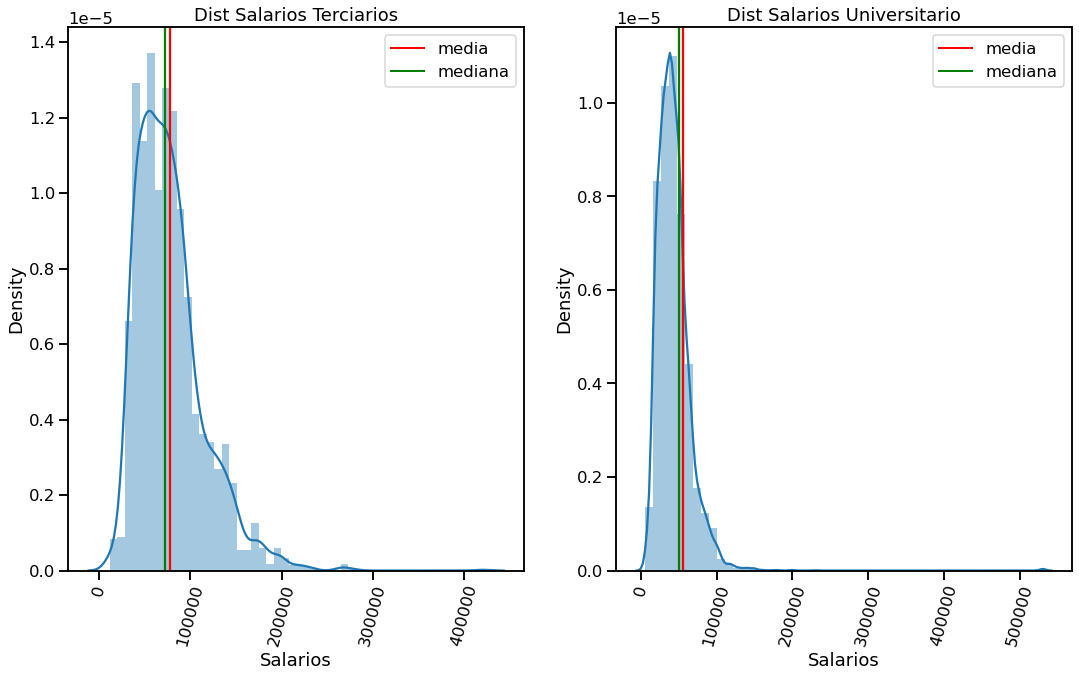

In [135]:
from matplotlib.lines import Line2D
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

seaborn.distplot(a = pob_terciario['salary_monthly_NETO'] ,ax = axes[0] )
seaborn.distplot(a = pob_universitario['salary_monthly_NETO'] ,ax = axes[1] )

plt.draw()

axes[0].set_xticklabels(axes[0].get_xticklabels(),rotation=75)
axes[0].set_xlabel('Salarios')

axes[1].set_xticklabels(axes[0].get_xticklabels(),rotation=75)
axes[1].set_xlabel('Salarios')


#axes[0].set_ylabel('Salario Bruto')
axes[0].set_title('Dist Salarios Terciarios')
axes[0].axvline(mean_ter, color='r', linestyle='-')
axes[0].axvline(median_ter, color='g', linestyle='-')

axes[1].set_title('Dist Salarios Universitario')
axes[1].axvline(mean_uni, color='r', linestyle='-')
axes[1].axvline(median_uni, color='g', linestyle='-')




custom_lines = [Line2D([0], [0], color='red', lw=2),
            Line2D([0], [0], color='green', lw=2)]

axes[0].legend(custom_lines , ['media','mediana'])
axes[1].legend(custom_lines , ['media','mediana'])


/Users/coviedo/opt/anaconda3/envs/diplodatos-ayvd/lib/python3.6/site-packages/seaborn/distributions.py:2164: UserWarning: `displot` is a figure-level function and does not accept the ax= paramter. You may wish to try histplot.
  warnings.warn(msg, UserWarning)


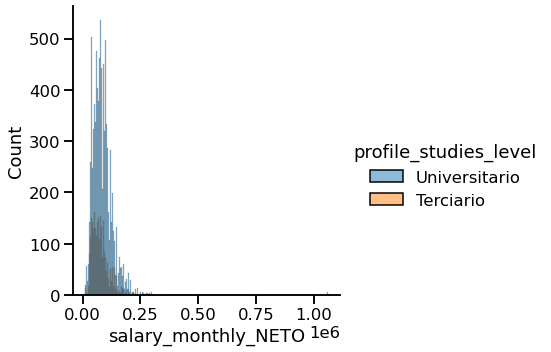

In [136]:


df_uni_ter = df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2['profile_studies_level'].isin(['Universitario' , 'Terciario'])]


seaborn.displot(df_uni_ter , x='salary_monthly_NETO' , hue='profile_studies_level' ,ax = axes[0] )


## d) Densidad Conjunta condicional

Elija dos variables numéricas y una categórica. 
Estudie la dispersión (scatterplot) de las dos variables discriminando en color por la variable categórica (ayuda: hue en seaborn)


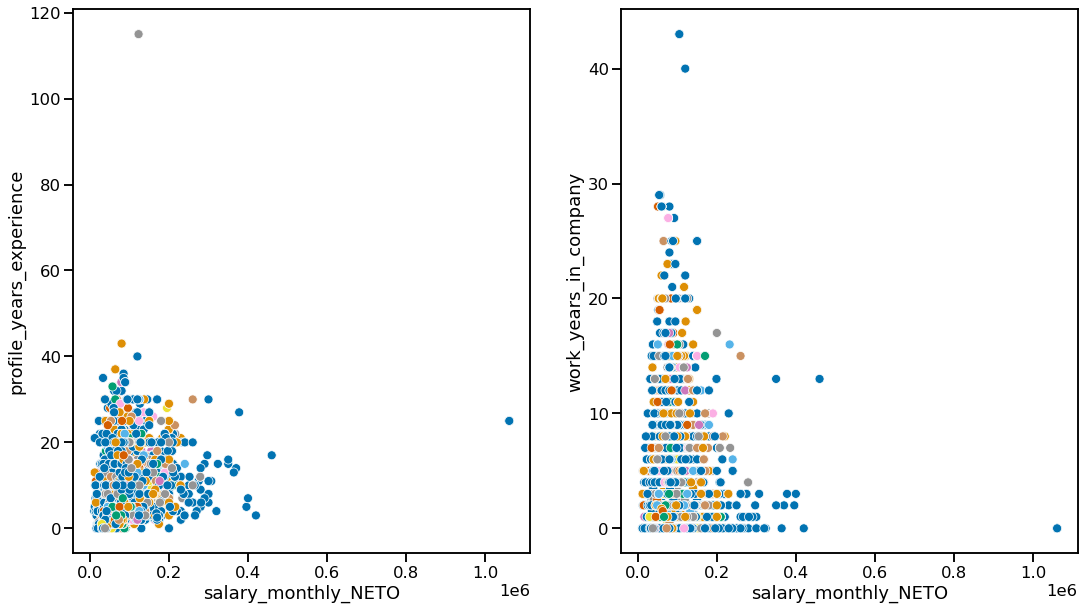

In [138]:

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))

#profile year experience está altamente correlacionada
g_ = seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="profile_years_experience" , hue='salary_percentage_inflation_adjustment_2020', palette="colorblind",legend= False)

g = seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2, x="salary_monthly_NETO", y="work_years_in_company" , hue='salary_percentage_inflation_adjustment_2020',palette="colorblind",legend= False)


In [ ]:
# Se observa un outlayer importante en profile_years_experiencie. Lo eliminamos para que el diagrama no se 'compacte'

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='work_years_in_company'>

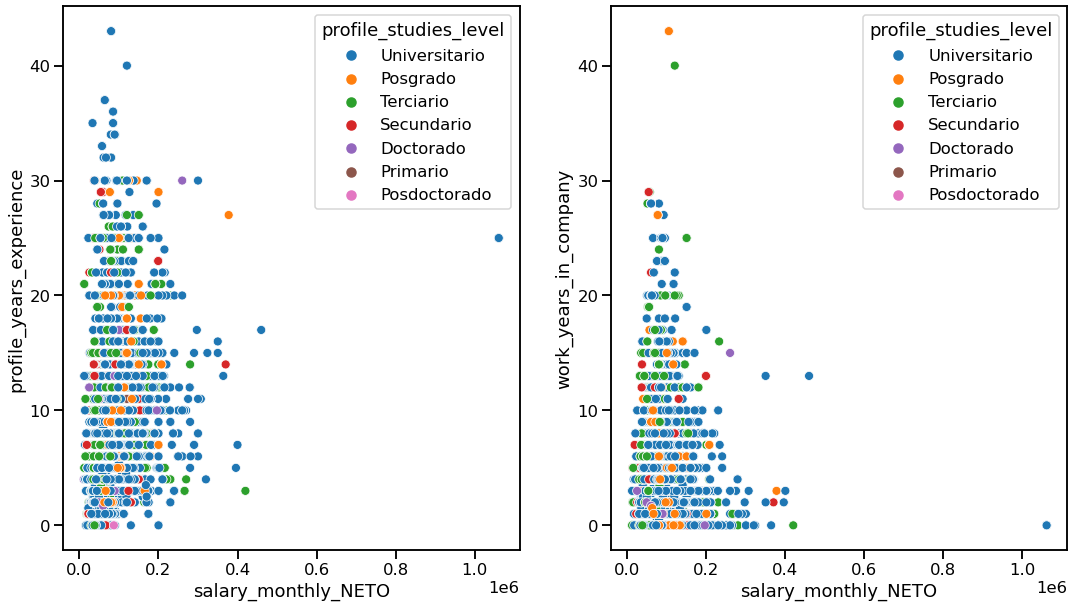

In [139]:
fig, axes = plt.subplots(1, 2 , figsize=(18, 10))


seaborn.scatterplot(ax = axes[0] , data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 60], x="salary_monthly_NETO", y="profile_years_experience" , hue="profile_studies_level")

seaborn.scatterplot(ax = axes[1] , data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 60], x="salary_monthly_NETO", y="work_years_in_company" , hue="profile_studies_level")

<AxesSubplot:xlabel='salary_monthly_NETO', ylabel='work_people_in_charge_of'>

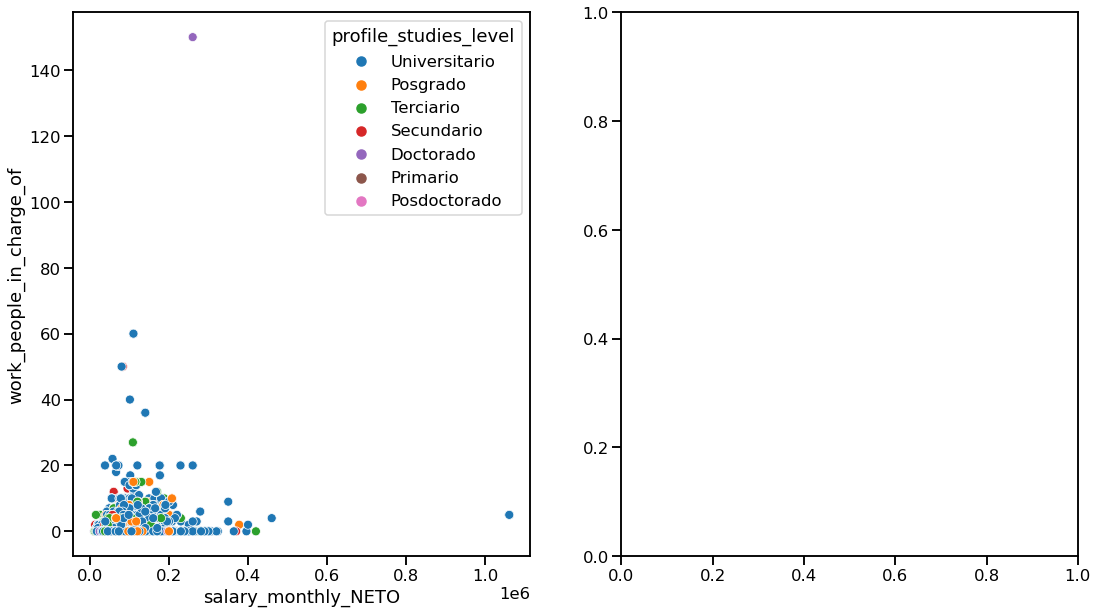

In [140]:

fig, axes = plt.subplots(1, 2 , figsize=(18, 10))


seaborn.scatterplot(ax = axes[0]  ,data=df_no_outliers_interesting_languages_part_2[df_no_outliers_interesting_languages_part_2.profile_years_experience < 60], x="salary_monthly_NETO", y="work_people_in_charge_of" , hue="profile_studies_level")